<a href="https://colab.research.google.com/github/IcelandOx/DSPP4/blob/main/Board_Game_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets
!pip install pandas

import kagglehub

#download latest version, dataset from Kaggle, ultimately from BGG, permission granted for academic use.
path = kagglehub.dataset_download
("threnjen/board-games-database-from-boardgamegeek")

print("Path to dataset files:",path)

Path to dataset files: <function dataset_download at 0x7e0844f3e520>


In [ ]:
# For use once dataset downloaded. Will not need to re-download
!pip install opendatasets
!pip install pandas

In [ ]:
#Mounts Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Imports relevant libraries (and a few extra from initial experimentation)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive  # if using colab uncomment this line
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import yellowbrick

In [ ]:
# change the directory to our file location
os.chdir('/content/drive/MyDrive/board-games-database-from-boardgamegeek')

In [ ]:
# load our file as a dataframe
filename = 'Updated Project Data.csv'
df = pd.read_csv(filename) #pd is short for pandas

In [ ]:

import opendatasets as od
import pandas as pd

drive_path = '/content/drive/MyDrive'
od.download("https://www.kaggle.com/datasets/threnjen/board-games-database-from-boardgamegeek",
            drive_path)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: icelandox
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/threnjen/board-games-database-from-boardgamegeek


100%|██████████| 148M/148M [00:00<00:00, 208MB/s]


In [ ]:
#Loads main game file (csv) originally from BGG/Kaggle into Python
file = ('/content/drive/MyDrive/board-games-database-from-boardgamegeek/games.csv')
newData = pd.read_csv(file)
print(len(newData))
newData.head()

21925


,BGGId,Name,Description,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,...,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
0,1,Die Macher,die macher game seven sequential political rac...,1986,4.3206,7.61428,7.10363,1.57979,3,5,...,21926,21926,0,1,0,0,0,0,0,0
1,2,Dragonmaster,dragonmaster tricktaking card game base old ga...,1981,1.9630,6.64537,5.78447,1.45440,3,4,...,21926,21926,0,1,0,0,0,0,0,0
2,3,Samurai,samurai set medieval japan player compete gain...,1998,2.4859,7.45601,7.23994,1.18227,2,4,...,21926,21926,0,1,0,0,0,0,0,0
3,4,Tal der Könige,triangular box luxurious large block tal der k...,1992,2.6667,6.60006,5.67954,1.23129,2,4,...,21926,21926,0,0,0,0,0,0,0,0
4,5,Acquire,acquire player strategically invest business t...,1964,2.5031,7.33861,7.14189,1.33583,2,6,...,21926,21926,0,1,0,0,0,0,0,0


In [ ]:
#Loads mechanics file (csv) originally from BGG/Kaggle into Python
file = ('/content/drive/MyDrive/board-games-database-from-boardgamegeek/mechanics.csv')
mechanics = pd.read_csv(file)

#Lists number of rows
print(len(mechanics))
#Views top rows
mechanics.head()

21925


,BGGId,Alliances,Area Majority / Influence,Auction/Bidding,Dice Rolling,Hand Management,Simultaneous Action Selection,Trick-taking,Hexagon Grid,Once-Per-Game Abilities,...,Contracts,Passed Action Token,King of the Hill,Action Retrieval,Force Commitment,Rondel,Automatic Resource Growth,Legacy Game,Dexterity,Physical
0,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,1,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,4,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Initial data cleaning - drops NA rows
games = games.dropna()

In [ ]:
len(games)

21925

In [ ]:
#Identifies fields with null values
games.isna().sum(axis=0)

,0
BGGId,0
Name,0
Description,1
YearPublished,0
GameWeight,0
AvgRating,0
BayesAvgRating,0
StdDev,0
MinPlayers,0
MaxPlayers,0


In [ ]:
#Performs 'left join' between Games dataset and Mechanics dataset, joined using 'BDDId' as key
games = pd.merge(newData,mechanics, on="BGGId")
games.head()

,BGGId,Name,Description,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,...,Contracts,Passed Action Token,King of the Hill,Action Retrieval,Force Commitment,Rondel,Automatic Resource Growth,Legacy Game,Dexterity,Physical
0,1,Die Macher,die macher game seven sequential political rac...,1986,4.3206,7.61428,7.10363,1.57979,3,5,...,0,0,0,0,0,0,0,0,0,0
1,2,Dragonmaster,dragonmaster tricktaking card game base old ga...,1981,1.9630,6.64537,5.78447,1.45440,3,4,...,0,0,0,0,0,0,0,0,0,0
2,3,Samurai,samurai set medieval japan player compete gain...,1998,2.4859,7.45601,7.23994,1.18227,2,4,...,0,0,0,0,0,0,0,0,0,0
3,4,Tal der Könige,triangular box luxurious large block tal der k...,1992,2.6667,6.60006,5.67954,1.23129,2,4,...,0,0,0,0,0,0,0,0,0,0
4,5,Acquire,acquire player strategically invest business t...,1964,2.5031,7.33861,7.14189,1.33583,2,6,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(len(games))
list(games.columns)

21925


['BGGId',
 'Name',
 'Description',
 'YearPublished',
 'GameWeight',
 'AvgRating',
 'BayesAvgRating',
 'StdDev',
 'MinPlayers',
 'MaxPlayers',
 'ComAgeRec',
 'LanguageEase',
 'BestPlayers',
 'GoodPlayers',
 'NumOwned',
 'NumWant',
 'NumWish',
 'NumWeightVotes',
 'MfgPlaytime',
 'ComMinPlaytime',
 'ComMaxPlaytime',
 'MfgAgeRec',
 'NumUserRatings',
 'NumComments',
 'NumAlternates',
 'NumExpansions',
 'NumImplementations',
 'IsReimplementation',
 'Family',
 'Kickstarted',
 'ImagePath',
 'Rank:boardgame',
 'Rank:strategygames',
 'Rank:abstracts',
 'Rank:familygames',
 'Rank:thematic',
 'Rank:cgs',
 'Rank:wargames',
 'Rank:partygames',
 'Rank:childrensgames',
 'Cat:Thematic',
 'Cat:Strategy',
 'Cat:War',
 'Cat:Family',
 'Cat:CGS',
 'Cat:Abstract',
 'Cat:Party',
 'Cat:Childrens',
 'Alliances',
 'Area Majority / Influence',
 'Auction/Bidding',
 'Dice Rolling',
 'Hand Management',
 'Simultaneous Action Selection',
 'Trick-taking',
 'Hexagon Grid',
 'Once-Per-Game Abilities',
 'Set Collection',


In [ ]:
#Shows most recent date for year published to understand age of dataset. 4 years is acceptable for exercise
max(newData['YearPublished'])

2021

In [ ]:
#Enables more comprehensive displays to make data more legible (using .head())
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Prevent line wrapping

In [ ]:
#Filtered board game data from Kaggle/BoardGameGeek
data = newData[newData['YearPublished'] >= 1990]
data = data[data['AvgRating'] >= 8]
data = data.sort_values(by='AvgRating', ascending=False)
print(len(data))
data.head(5)


825


,BGGId,Name,Description,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,BestPlayers,GoodPlayers,NumOwned,NumWant,NumWish,NumWeightVotes,MfgPlaytime,ComMinPlaytime,ComMaxPlaytime,MfgAgeRec,NumUserRatings,NumComments,NumAlternates,NumExpansions,NumImplementations,IsReimplementation,Family,Kickstarted,ImagePath,Rank:boardgame,Rank:strategygames,Rank:abstracts,Rank:familygames,Rank:thematic,Rank:cgs,Rank:wargames,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
20005,275777,Erune,enter world erune roam dark dungeon experience...,2021,0.0000,9.59524,5.51947,1.235570,2,5,NaN,NaN,0,[],17,10,77,0,120,60,120,12,42,0,0,0,0,0,NaN,0,https://cf.geekdo-images.com/IhRxHRWHMKOIrJRl_...,14588,21926,21926,21926,21926,21926,21926,21926,21926,0,0,0,0,0,0,0,0
21915,345976,System Gateway (fan expansion for Android: Net...,system gateway niseirsquos foundational set de...,2021,0.0000,9.48333,5.57641,1.017210,2,2,NaN,NaN,0,[],90,5,17,0,0,0,0,0,36,0,0,3,0,0,Android – Netrunner (LCG),0,https://cf.geekdo-images.com/WvaMb1dkOVOT6alXp...,8532,21926,21926,21926,21926,21926,21926,21926,21926,0,0,0,0,0,0,0,0
17507,228370,TerroriXico,description designeracross age terrifying mexi...,2018,2.5000,9.42857,5.50463,1.695130,2,4,10.0,NaN,0,[],36,8,31,2,30,20,30,10,70,0,0,0,0,0,NaN,1,https://cf.geekdo-images.com/0cQchRv5uJx_DvH1m...,17191,21926,21926,21926,21926,21926,21926,21926,21926,0,0,0,0,0,0,0,0
19119,256885,The Fantasy Trip: Legacy Edition,fantasy trip legacy edition box set include ...,2019,2.8333,9.32946,5.73728,0.979854,2,10,12.0,NaN,0,[],594,21,87,6,60,30,60,10,387,0,0,0,0,0,The Fantasy Trip (Steve Jackson Games),1,https://cf.geekdo-images.com/hQ6VKyvzxaWi25i13...,21926,21926,21926,21926,21926,21926,21926,21926,21926,0,0,0,0,0,0,0,0
14462,173514,Meeple Quest,fantasy boardgame true dungeon explore mechani...,2021,1.5000,9.31111,5.52464,1.488060,1,5,6.0,422.5,0,[],13,7,93,2,90,15,90,8,45,0,0,0,0,0,NaN,1,https://cf.geekdo-images.com/OUu8v4kSvAftENh1C...,13725,21926,21926,21926,21926,21926,21926,21926,21926,0,0,0,0,0,0,0,0


In [ ]:
#Writes data to CSV
games.to_csv (r'/content/drive/MyDrive/gamesdata.csv', index = None, header=True)

In [ ]:
#reduces games dataset to version where NumUserRatings are > 75
print(len(games))
games = games[games["NumUserRatings"] > 75]
print(len(games))

21925
14154


In [ ]:
#Exploring range of values in NumUserRatings field:
print((games["NumUserRatings"]).min())
print((games["NumUserRatings"]).max())
print((games["NumUserRatings"]).mean())
print((games["NumUserRatings"]).median())

30
108101
861.6683238312429
123.0


In [ ]:
#Deletes columns no considered for clustering
clus_data = data.drop([
    "Description",
    "NumWant",
    "NumWish",
    "GoodPlayers",
    "StdDev",
    "NumComments",
    "NumAlternates",
    "NumImplementations",
    "IsReimplementation",
    "ImagePath"
    ],
    axis = 1)

clus_data.nunique()


,0
BGGId,825
Name,823
YearPublished,27
GameWeight,379
AvgRating,810
BayesAvgRating,818
MinPlayers,6
MaxPlayers,18
ComAgeRec,173
LanguageEase,445


Fields to use in K-Means:

AvgRating, NumUserRatings, Rank:boardgame

In [ ]:
#Installs K-means library
pip install kneed

In [ ]:
#Possibly duplicated, but installs relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')


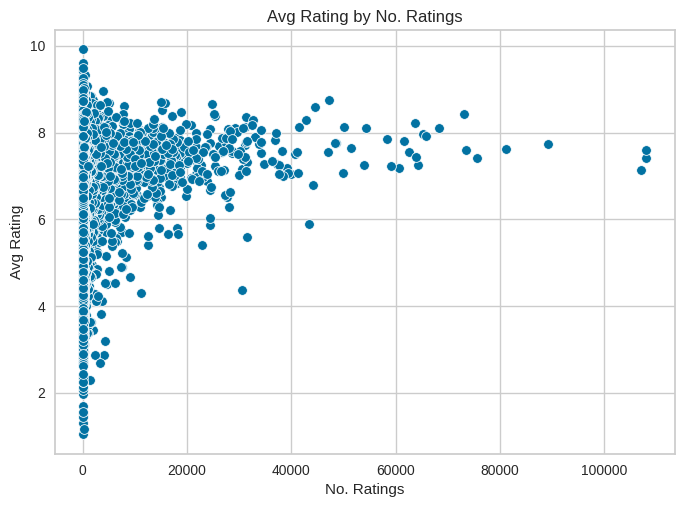

In [ ]:
#Scatterplot showing relationship between number of ratings and average rating
sns.scatterplot(games, x="NumUserRatings", y="AvgRating")
plt.title("Avg Rating by No. Ratings")
plt.xlabel("No. Ratings")
plt.ylabel("Avg Rating")
plt.show()

In [ ]:
#Another library
pip install yellowbrick

In [ ]:
import plotly.express as px

**Linear Regression Experiment start**

In [ ]:
#More libraries
!pip install numpy
!pip install sweetviz
!pip install google
!pip install seaborn
!pip install yellowbrick
!pip install statsmodels
!pip install sktime
!pip install skforecast
!pip install pmdarima
!pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.5/149.5 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 37.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit cod

In [ ]:
from platform import python_version
print(python_version())

3.12.12


In [ ]:
#Loading file
file = ('/content/drive/MyDrive/gamesdata.csv')
games = pd.read_csv(file)
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Prevent line wrapping
print(len(games))
games.head()

21925


,BGGId,Name,Description,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,BestPlayers,GoodPlayers,NumOwned,NumWant,NumWish,NumWeightVotes,MfgPlaytime,ComMinPlaytime,ComMaxPlaytime,MfgAgeRec,NumUserRatings,NumComments,NumAlternates,NumExpansions,NumImplementations,IsReimplementation,Family,Kickstarted,ImagePath,Rank:boardgame,Rank:strategygames,Rank:abstracts,Rank:familygames,Rank:thematic,Rank:cgs,Rank:wargames,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens,Alliances,Area Majority / Influence,Auction/Bidding,Dice Rolling,Hand Management,Simultaneous Action Selection,Trick-taking,Hexagon Grid,Once-Per-Game Abilities,Set Collection,Tile Placement,Action Points,Investment,Market,Square Grid,Stock Holding,Victory Points as a Resource,Enclosure,Pattern Building,Pattern Recognition,Modular Board,Network and Route Building,Point to Point Movement,Melding and Splaying,Negotiation,Trading,Push Your Luck,Income,Race,Random Production,Variable Set-up,Roll / Spin and Move,Variable Player Powers,Action Queue,Bias,Grid Movement,Lose a Turn,Programmed Movement,Scenario / Mission / Campaign Game,Voting,Events,Paper-and-Pencil,Player Elimination,Role Playing,Movement Points,Simulation,Variable Phase Order,Area Movement,Commodity Speculation,Cooperative Game,Deduction,Sudden Death Ending,Connections,Highest-Lowest Scoring,Betting and Bluffing,Memory,Score-and-Reset Game,Layering,Map Addition,Secret Unit Deployment,Increase Value of Unchosen Resources,Ratio / Combat Results Table,Take That,Team-Based Game,Campaign / Battle Card Driven,Tech Trees / Tech Tracks,Player Judge,Chit-Pull System,Three Dimensional Movement,Action Drafting,Minimap Resolution,Stat Check Resolution,Action Timer,Pick-up and Deliver,Map Deformation,Bingo,Crayon Rail System,Multiple Maps,Hidden Roles,Line Drawing,Tug of War,Pattern Movement,Static Capture,Different Dice Movement,Chaining,Ladder Climbing,Predictive Bid,Solo / Solitaire Game,Line of Sight,Critical Hits and Failures,Interrupts,Zone of Control,Bribery,End Game Bonuses,Area-Impulse,Worker Placement,Measurement Movement,Map Reduction,Real-Time,Resource to Move,Mancala,Ownership,Kill Steal,Hidden Movement,Track Movement,Deck Construction,Drafting,TableauBuilding,Prisoner's Dilemma,Hidden Victory Points,Movement Template,Slide/Push,Targeted Clues,Command Cards,Grid Coverage,Relative Movement,Action/Event,Card Play Conflict Resolution,"I Cut, You Choose",Die Icon Resolution,Elapsed Real Time Ending,Advantage Token,Storytelling,Catch the Leader,Roles with Asymmetric Information,Traitor Game,Moving Multiple Units,Semi-Cooperative Game,Communication Limits,Time Track,Speed Matching,Cube Tower,Re-rolling and Locking,Impulse Movement,Loans,Delayed Purchase,"Deck, Bag, and Pool Building",Move Through Deck,Single Loser Game,Matching,Induction,Physical Removal,Narrative Choice / Paragraph,Pieces as Map,Follow,Finale Ending,Order Counters,Contracts,Passed Action Token,King of the Hill,Action Retrieval,Force Commitment,Rondel,Automatic Resource Growth,Legacy Game,Dexterity,Physical
0,1,Die Macher,die macher game seven sequential political rac...,1986,4.3206,7.61428,7.10363,1.57979,3,5,14.366667,1.395833,5,"['4', '5']",7498,501,2039,761,240,240,240,14,5354,0,2,0,0,0,Classic Line (Valley Games),0,https://cf.geekdo-images.com/rpwCZAjYLD940NWwP...,316,180,21926,21926,21926,21926,21926,21926,21926,0,1,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Dragonmaster,dragonmaster tricktaking card game base old ga...,1981,1.9630,6.64537,5.78447,1.45440,3,4,NaN,27.000000,0,[],1285,72,191,54,30,30,30,12,562,0,0,0,2,1,NaN,0,https://cf.ge

In [ ]:
import pandas as pd
import sweetviz as sv
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive  # if using colab uncomment this line
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import yellowbrick
# Importing the Required libraries for regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120}) # set figure sizes
import matplotlib.ticker as mtick
plt.style.use('fivethirtyeight')

In [ ]:
#Identifies fields with null values
print(len(games))
games.isna().sum(axis=0)

21925


,0
BGGId,0
Name,0
Description,1
YearPublished,0
GameWeight,0
AvgRating,0
BayesAvgRating,0
StdDev,0
MinPlayers,0
MaxPlayers,0


In [ ]:
#Deletes columns no considered for clustering
games = games.drop([
    "Description",
    "ComAgeRec",
    "LanguageEase",
    "Family",
    "ImagePath",
    "GoodPlayers"
    ],
    axis = 1)

games.nunique()


,0
BGGId,21925
Name,21521
YearPublished,188
GameWeight,3921
AvgRating,20489
BayesAvgRating,15950
StdDev,19527
MinPlayers,11
MaxPlayers,54
BestPlayers,14


In [ ]:
games = games.dropna(subset=["LanguageEase","ComAgeRec"])

In [ ]:
#Displays metadata
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21925 entries, 0 to 21924
Columns: 205 entries, BGGId to Physical
dtypes: float64(6), int64(194), object(5)
memory usage: 34.3+ MB


#Four fields to be used to form 'complexity' metric, not used in final experiment':
LanguageEase
GameWeight
ComMaxPlaytime
ComAgeRec

In [ ]:
#Uses min/max scaler to force values between 0 and 1, makes easy to compare.
##copy=True
#If True, the original data is not modified; a copy is created.
#If False, scaling may happen in place (overwriting original data).

##clip=False
#If True, values outside the feature range after transformation are clipped to the range.
#If False, they are left as-is (can happen if you transform new data with values outside the original fit range).

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1), copy=True, clip=False)
games[['LanguageEase_scaled', 'GameWeight_scaled', 'ComMaxPlaytime_scaled', 'ComAgeRec_scaled']] = scaler.fit_transform(games[['LanguageEase', 'GameWeight', 'ComMaxPlaytime', 'ComAgeRec']])


In [ ]:
#view data now scaled (between 0 and 1 for four predictor variables)
games.head()

,BGGId,Name,Description,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,BestPlayers,GoodPlayers,NumOwned,NumWant,NumWish,NumWeightVotes,MfgPlaytime,ComMinPlaytime,ComMaxPlaytime,MfgAgeRec,NumUserRatings,NumComments,NumAlternates,NumExpansions,NumImplementations,IsReimplementation,Family,Kickstarted,ImagePath,Rank:boardgame,Rank:strategygames,Rank:abstracts,Rank:familygames,Rank:thematic,Rank:cgs,Rank:wargames,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens,Alliances,Area Majority / Influence,Auction/Bidding,Dice Rolling,Hand Management,Simultaneous Action Selection,Trick-taking,Hexagon Grid,Once-Per-Game Abilities,Set Collection,Tile Placement,Action Points,Investment,Market,Square Grid,Stock Holding,Victory Points as a Resource,Enclosure,Pattern Building,Pattern Recognition,Modular Board,Network and Route Building,Point to Point Movement,Melding and Splaying,Negotiation,Trading,Push Your Luck,Income,Race,Random Production,Variable Set-up,Roll / Spin and Move,Variable Player Powers,Action Queue,Bias,Grid Movement,Lose a Turn,Programmed Movement,Scenario / Mission / Campaign Game,Voting,Events,Paper-and-Pencil,Player Elimination,Role Playing,Movement Points,Simulation,Variable Phase Order,Area Movement,Commodity Speculation,Cooperative Game,Deduction,Sudden Death Ending,Connections,Highest-Lowest Scoring,Betting and Bluffing,Memory,Score-and-Reset Game,Layering,Map Addition,Secret Unit Deployment,Increase Value of Unchosen Resources,Ratio / Combat Results Table,Take That,Team-Based Game,Campaign / Battle Card Driven,Tech Trees / Tech Tracks,Player Judge,Chit-Pull System,Three Dimensional Movement,Action Drafting,Minimap Resolution,Stat Check Resolution,Action Timer,Pick-up and Deliver,Map Deformation,Bingo,Crayon Rail System,Multiple Maps,Hidden Roles,Line Drawing,Tug of War,Pattern Movement,Static Capture,Different Dice Movement,Chaining,Ladder Climbing,Predictive Bid,Solo / Solitaire Game,Line of Sight,Critical Hits and Failures,Interrupts,Zone of Control,Bribery,End Game Bonuses,Area-Impulse,Worker Placement,Measurement Movement,Map Reduction,Real-Time,Resource to Move,Mancala,Ownership,Kill Steal,Hidden Movement,Track Movement,Deck Construction,Drafting,TableauBuilding,Prisoner's Dilemma,Hidden Victory Points,Movement Template,Slide/Push,Targeted Clues,Command Cards,Grid Coverage,Relative Movement,Action/Event,Card Play Conflict Resolution,"I Cut, You Choose",Die Icon Resolution,Elapsed Real Time Ending,Advantage Token,Storytelling,Catch the Leader,Roles with Asymmetric Information,Traitor Game,Moving Multiple Units,Semi-Cooperative Game,Communication Limits,Time Track,Speed Matching,Cube Tower,Re-rolling and Locking,Impulse Movement,Loans,Delayed Purchase,"Deck, Bag, and Pool Building",Move Through Deck,Single Loser Game,Matching,Induction,Physical Removal,Narrative Choice / Paragraph,Pieces as Map,Follow,Finale Ending,Order Counters,Contracts,Passed Action Token,King of the Hill,Action Retrieval,Force Commitment,Rondel,Automatic Resource Growth,Legacy Game,Dexterity,Physical,LanguageEase_scaled,GameWeight_scaled,ComMaxPlaytime_scaled,ComAgeRec_scaled
0,1,Die Macher,die macher game seven sequential political rac...,1986,4.3206,7.61428,7.10363,1.57979,3,5,14.366667,1.395833,5,"['4', '5']",7498,501,2039,761,240,240,240,14,5354,0,2,0,0,0,Classic Line (Valley Games),0,https://cf.geekdo-images.com/rpwCZAjYLD940NWwP...,316,180,21926,21926,21926,21926,21926,21926,21926,0,1,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000225,0.86412,0.0040,0.650877
1,2,Dragonmaster,dragonmaster tricktaking card game base old ga...,1981,1.96

In [ ]:
#Establishing 'Complexity' metrics from scaled values
games["Complexity"] = games[['LanguageEase_scaled', 'GameWeight_scaled', 'ComMaxPlaytime_scaled', 'ComAgeRec_scaled']].mean(axis=1)

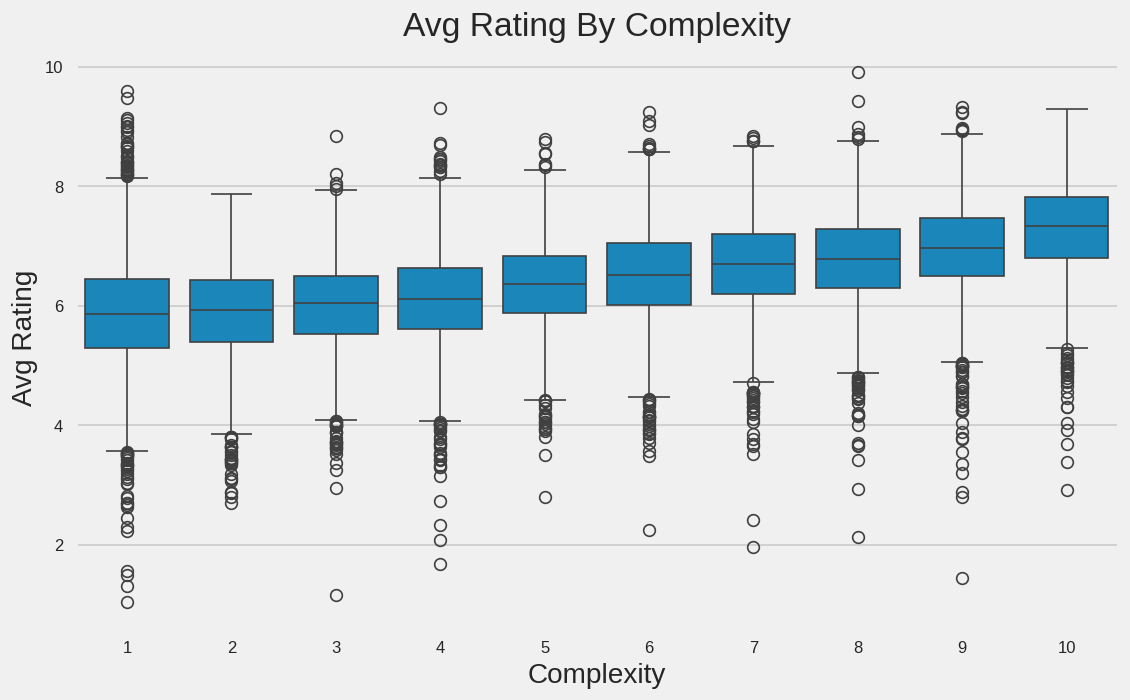

In [ ]:
# There were too many distinct values to plot using 'Complexity' alone, so 'binned' into 10 groups using qcut
boxplotgames = games.copy()
boxplotgames["GameWeight"] = pd.qcut(games['GameWeight'], q=10, labels = ["1","2","3","4","5","6","7","8","9","10"])

# Box plots
plt.figure(figsize=(10,6))
sns.boxplot(x='GameWeight', y='AvgRating', data=boxplotgames)

# Titles and labels
plt.title('Avg Rating By Complexity')
plt.xlabel('Complexity')
plt.ylabel('Avg Rating')
plt.show()

Text(0.5, 1.0, 'Avg Rating by Complexity')

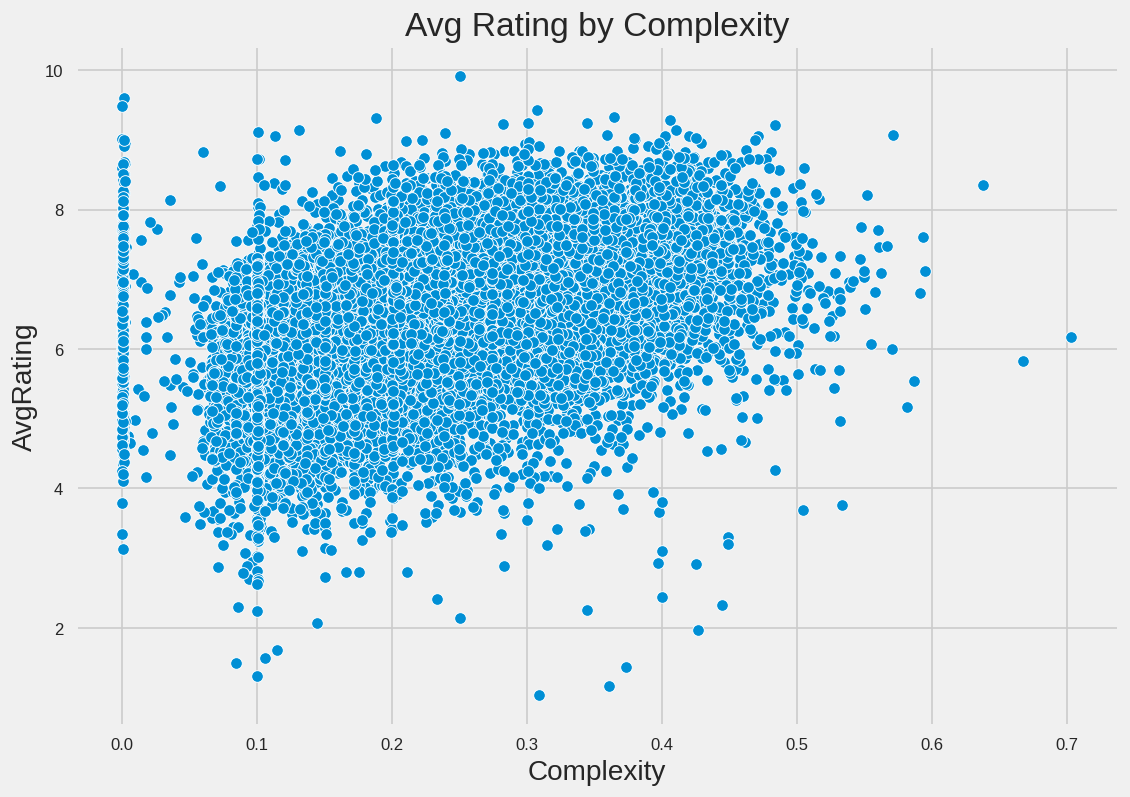

In [ ]:
#Multiple fields were explored when looking for a linear relationship between X variable and ratings
#A loose linear relationship could be observed by using 'Complexity' (GameWeight)
sns.scatterplot(data=games, x="Complexity", y="AvgRating")
plt.title('Avg Rating by Complexity')

Text(0.5, 1.0, 'Avg Rating by LanguageEase')

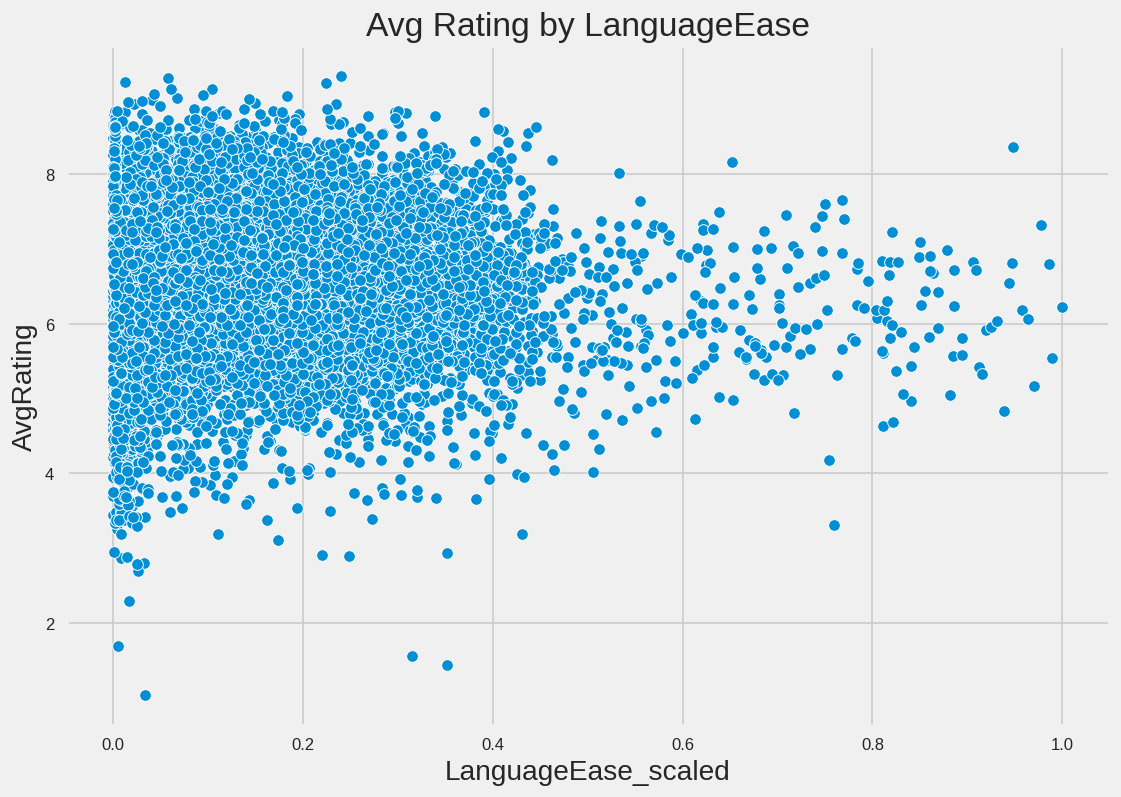

In [ ]:
#Language Ease was considered but increasing ease did not result in a significant increase in ratings
sns.scatterplot(data=games, x='LanguageEase_scaled', y="AvgRating")
plt.title('Avg Rating by LanguageEase')

Text(0.5, 1.0, 'Avg Rating by Game Weight')

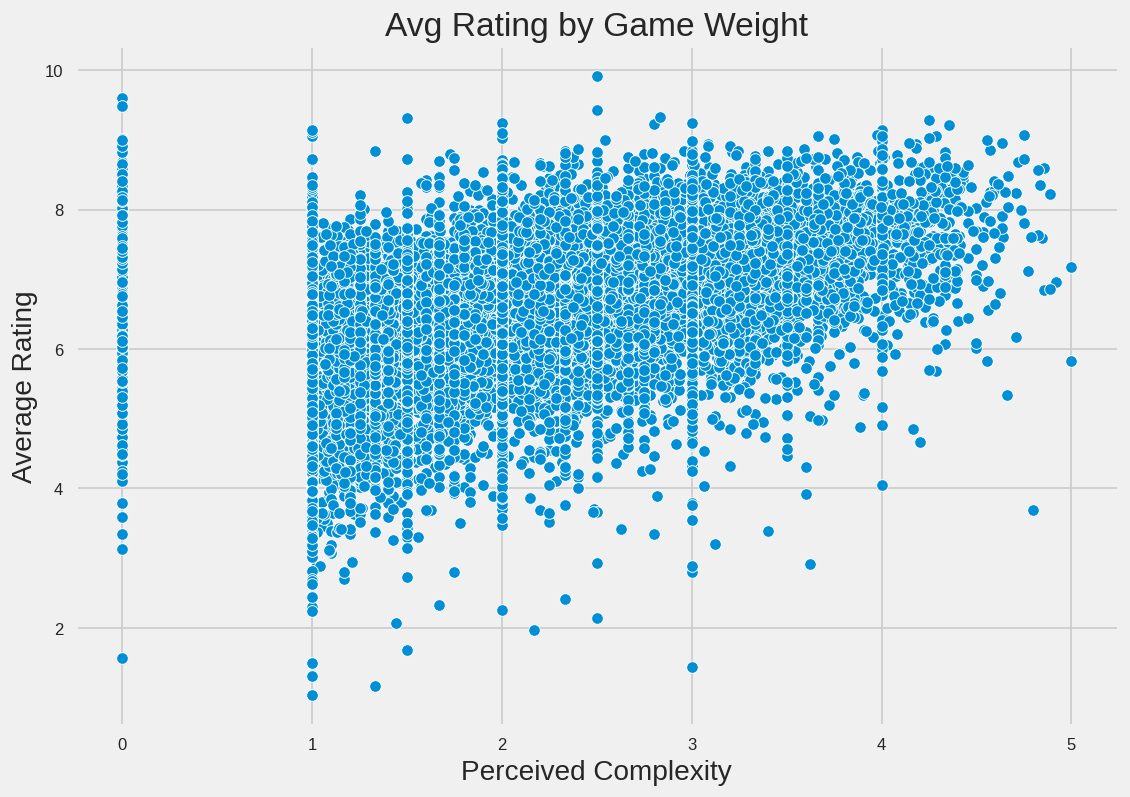

In [ ]:
#GameWeight (Complexity) considered again, this time without scalar values.
sns.scatterplot(data=games, x='GameWeight', y="AvgRating")
plt.xlabel("Perceived Complexity")
plt.ylabel("Average Rating")
plt.title('Avg Rating by Game Weight')

Text(0.5, 1.0, 'Avg Rating by Mean Play Time')

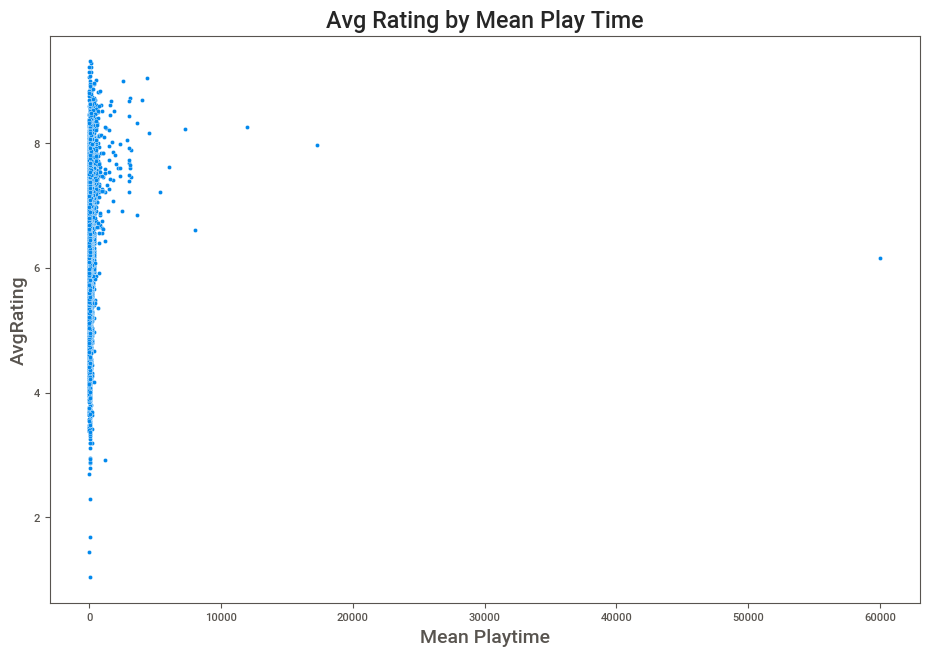

In [ ]:
#Mean playtime showed very little correlation between with ratings, though Median playtime may be more appropriate
sns.scatterplot(data=games, x='Mean Playtime', y="AvgRating")
plt.title('Avg Rating by Mean Play Time')

Text(0.5, 1.0, 'Avg Rating by Mean Play Time (Excluding bottom & top 5%)')

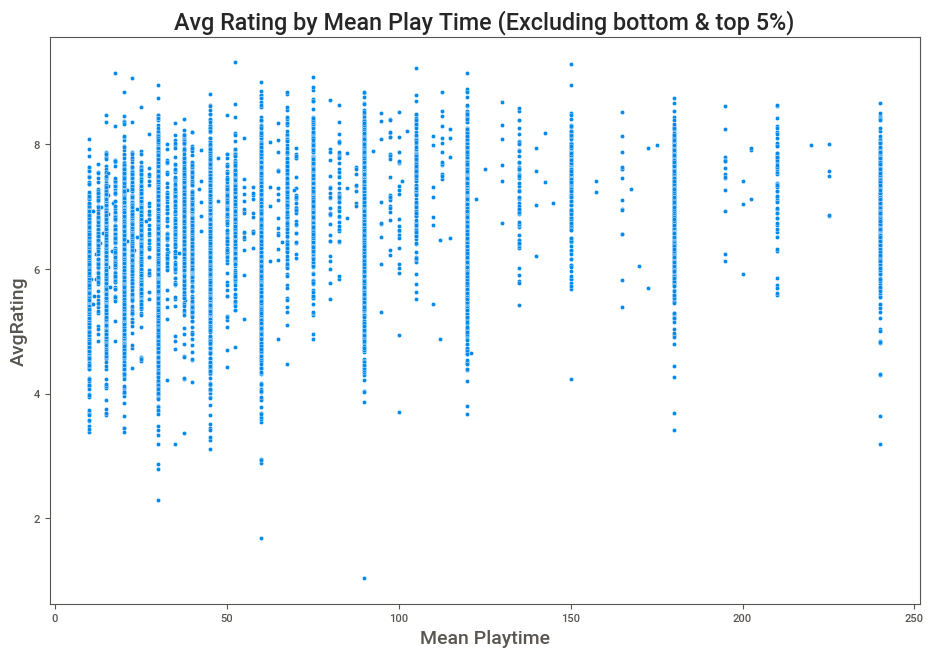

In [ ]:
#Given there are significant outliers shown above, data filtered to include 90%, removing 10% from that which is presented
lower = games['Mean Playtime'].quantile(0.05)  # 5th percentile
upper = games['Mean Playtime'].quantile(0.95)  # 95th percentile

filtered_games = games[(games['Mean Playtime'] >= lower) & (games['Mean Playtime'] <= upper)]

sns.scatterplot(data=filtered_games, x='Mean Playtime', y="AvgRating")
plt.title('Avg Rating by Mean Play Time (Excluding bottom & top 5%)')


In [ ]:
#Defines mean and median playtime
games["Mean Playtime"] = games[['ComMinPlaytime', 'ComMaxPlaytime']].mean(axis=1)
games["Median Playtime"] = games[['ComMinPlaytime', 'ComMaxPlaytime']].median(axis=1)

Text(0.5, 1.0, 'Avg Rating by Rank:boardgame')

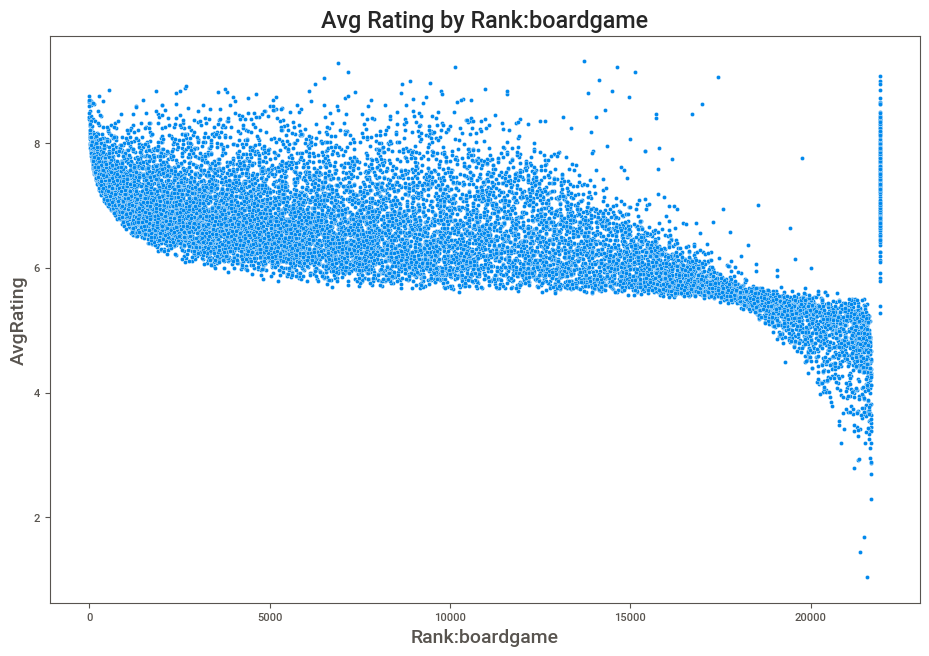

In [ ]:
#Game Rank versus ratings considered, however some manipulation must have already been applied to the underlying data given the ordered distribution.
#This field will not be considered given I'm looking to reach my own conclusions.
sns.scatterplot(data=games, x='Rank:boardgame', y="AvgRating")
plt.title('Avg Rating by Rank:boardgame')

In [ ]:
#Categorical Complexity was considered.
#Given games either fall under 1 or 0 if belonging to a particular category the sum of these values could be considered as
#a proxy for 'complexity', the more categories a game belongs to, the more 'complex' it is. Maybe it has wider appeal?
games["Categorical Complexity"] = games[['Cat:Thematic', 'Cat:Strategy',
 'Cat:War', 'Cat:Family', 'Cat:CGS', 'Cat:Abstract', 'Cat:Party', 'Cat:Childrens', 'Alliances', 'Area Majority / Influence', 'Auction/Bidding',
 'Dice Rolling', 'Hand Management', 'Simultaneous Action Selection', 'Trick-taking', 'Hexagon Grid', 'Once-Per-Game Abilities', 'Set Collection',
 'Tile Placement', 'Action Points', 'Investment', 'Market', 'Square Grid', 'Stock Holding', 'Victory Points as a Resource', 'Enclosure',
 'Pattern Building', 'Pattern Recognition', 'Modular Board', 'Network and Route Building', 'Point to Point Movement', 'Melding and Splaying',
 'Negotiation', 'Trading', 'Push Your Luck', 'Income', 'Race', 'Random Production', 'Variable Set-up', 'Roll / Spin and Move', 'Variable Player Powers',
 'Action Queue', 'Bias', 'Grid Movement', 'Lose a Turn', 'Programmed Movement', 'Scenario / Mission / Campaign Game', 'Voting', 'Events',
 'Paper-and-Pencil', 'Player Elimination', 'Role Playing', 'Movement Points', 'Simulation', 'Variable Phase Order', 'Area Movement',
 'Commodity Speculation', 'Cooperative Game', 'Deduction', 'Sudden Death Ending', 'Connections', 'Highest-Lowest Scoring', 'Betting and Bluffing',
 'Memory', 'Score-and-Reset Game', 'Layering', 'Map Addition', 'Secret Unit Deployment', 'Increase Value of Unchosen Resources',
 'Ratio / Combat Results Table', 'Take That', 'Team-Based Game', 'Campaign / Battle Card Driven', 'Tech Trees / Tech Tracks',
 'Player Judge', 'Chit-Pull System', 'Three Dimensional Movement', 'Action Drafting', 'Minimap Resolution', 'Stat Check Resolution',
 'Action Timer', 'Pick-up and Deliver', 'Map Deformation', 'Bingo', 'Crayon Rail System', 'Multiple Maps', 'Hidden Roles', 'Line Drawing',
 'Tug of War', 'Pattern Movement', 'Static Capture', 'Different Dice Movement', 'Chaining', 'Ladder Climbing', 'Predictive Bid',
 'Solo / Solitaire Game', 'Line of Sight', 'Critical Hits and Failures', 'Interrupts', 'Zone of Control', 'Bribery', 'End Game Bonuses',
 'Area-Impulse', 'Worker Placement', 'Measurement Movement', 'Map Reduction', 'Real-Time', 'Resource to Move', 'Mancala', 'Ownership',
 'Kill Steal', 'Hidden Movement', 'Track Movement', 'Deck Construction', 'Drafting', 'TableauBuilding', "Prisoner's Dilemma", 'Hidden Victory Points',
 'Movement Template', 'Slide/Push', 'Targeted Clues', 'Command Cards', 'Grid Coverage', 'Relative Movement', 'Action/Event', 'Card Play Conflict Resolution',
 'I Cut, You Choose', 'Die Icon Resolution', 'Elapsed Real Time Ending', 'Advantage Token', 'Storytelling', 'Catch the Leader', 'Roles with Asymmetric Information',
 'Traitor Game', 'Moving Multiple Units', 'Semi-Cooperative Game', 'Communication Limits', 'Time Track', 'Speed Matching', 'Cube Tower',
 'Re-rolling and Locking', 'Impulse Movement', 'Loans', 'Delayed Purchase', 'Deck, Bag, and Pool Building', 'Move Through Deck',
 'Single Loser Game', 'Matching', 'Induction', 'Physical Removal', 'Narrative Choice / Paragraph', 'Pieces as Map', 'Follow', 'Finale Ending',
 'Order Counters', 'Contracts', 'Passed Action Token', 'King of the Hill', 'Action Retrieval', 'Force Commitment', 'Rondel', 'Automatic Resource Growth',
 'Legacy Game', 'Dexterity', 'Physical']].sum(axis =1)

Text(0.5, 1.0, 'Avg Rating by Categorical Complexity (number of distinct categories game falls into)')

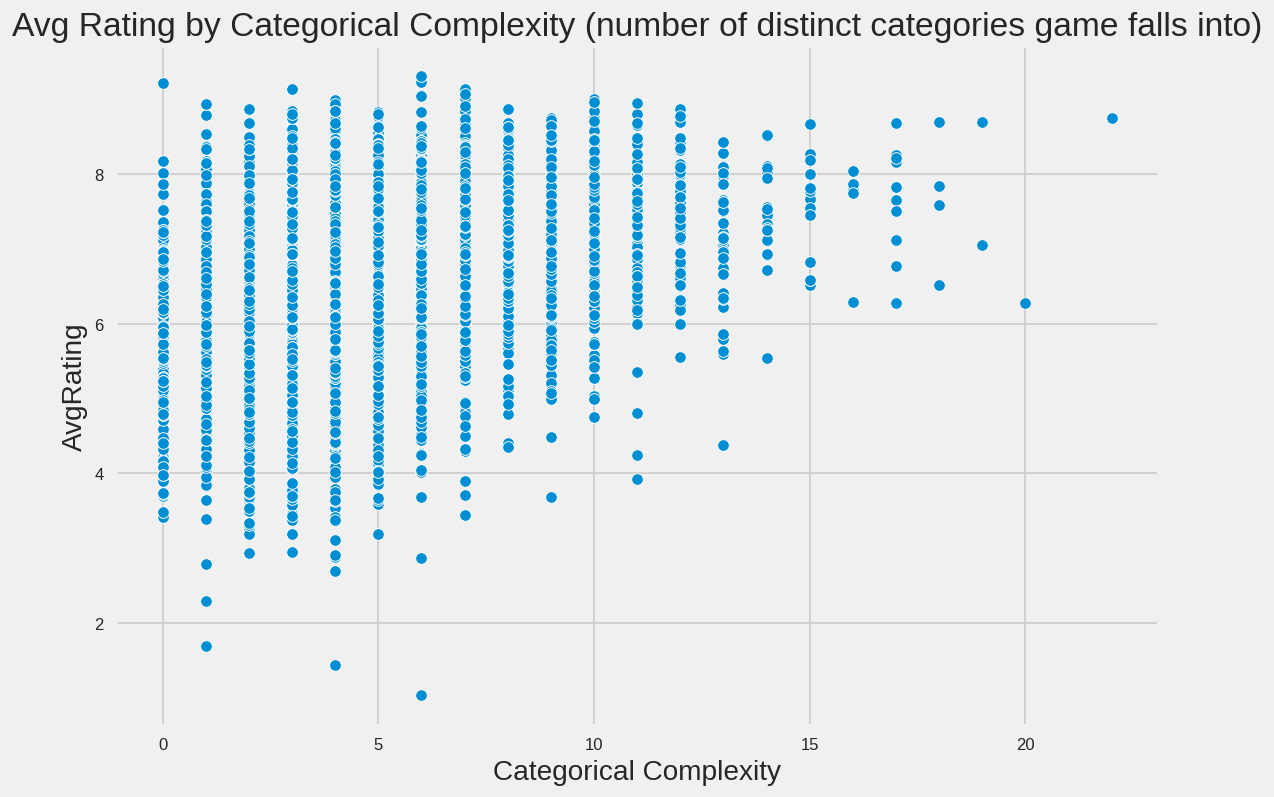

In [ ]:
#While a vague linear rend can be observed this isn't discernably different to the user-defined measure of 'gameweight'.
sns.scatterplot(data=games, x='Categorical Complexity', y="AvgRating")
plt.title('Avg Rating by Categorical Complexity (number of distinct categories game falls into)')

Text(0.5, 1.0, 'Avg Rating by Complexity)')

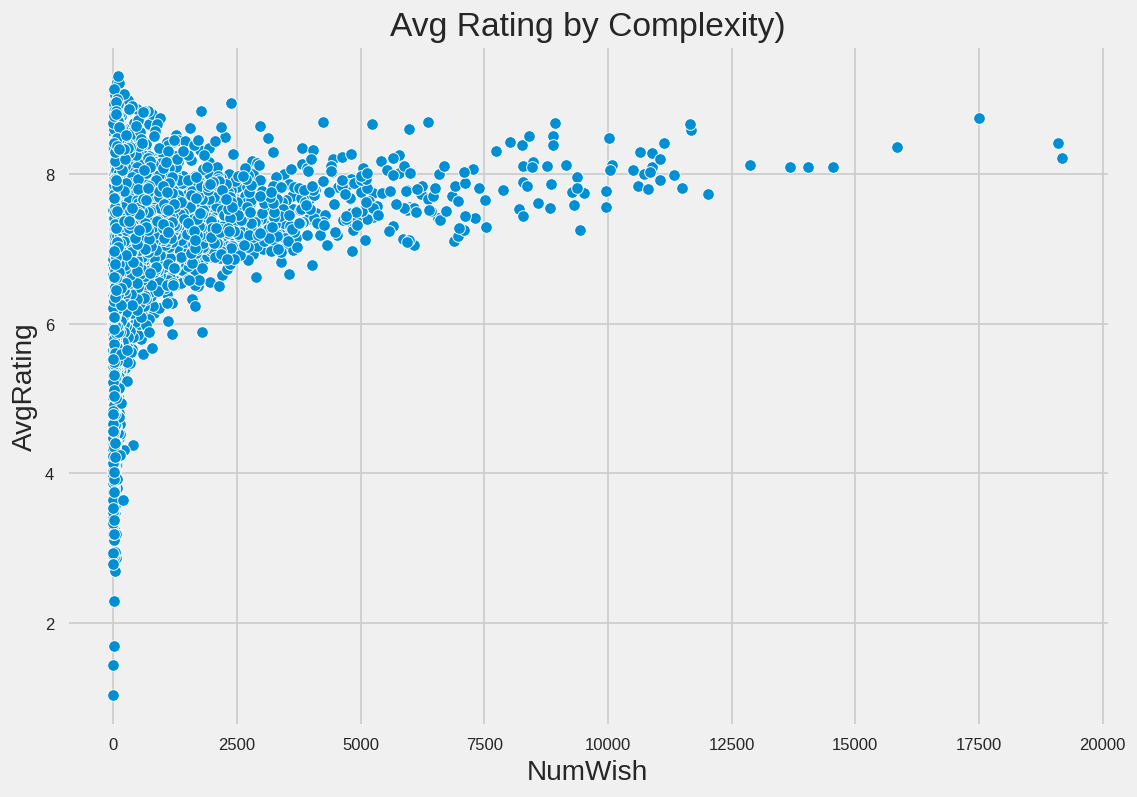

In [ ]:
sns.scatterplot(data=games, x='NumWish', y="AvgRating")
plt.title('Avg Rating by Complexity)')

Text(0.5, 1.0, 'Avg Rating by Game Weight (Filtered for Cat:Family)')

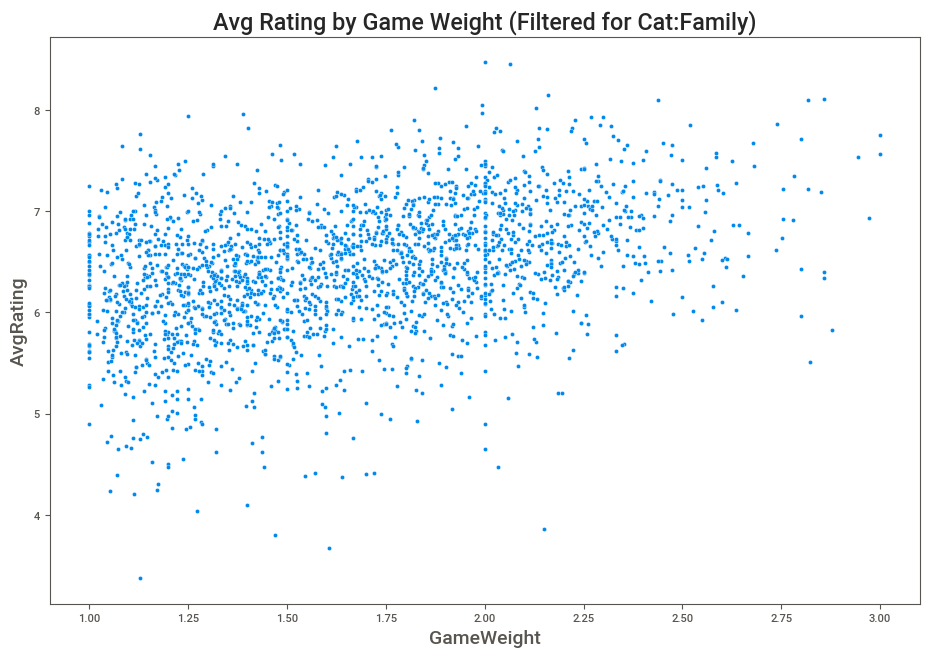

In [ ]:
#Uses Cat:Family games as a filter and predicts rating based on Game Weight (user defined complexity)
#Shows that instead of summing categories, filtering gameweight for individual categories can show more pronounced trends.
filtered_games = games[games['Cat:Family'] == 1]

sns.scatterplot(data=filtered_games, x='GameWeight', y="AvgRating")
plt.title('Avg Rating by Game Weight (Filtered for Cat:Family)')

In [ ]:
#Correlation coefficient function written to explore correlations between movements in gameweight and ratings, by each game category
def corrco(x,y):
  x2= sum(x)
  y2 = sum(y)
  avx = x.mean()
  avy = y.mean()
  diffx = x - avx
  diffy = y - avy
  prodxy = diffx*diffy
  sumprodnum = sum(prodxy)
  sqx = diffx**2
  sqy = diffy**2
  sumsqx = sum(sqx)
  sumsqy = sum(sqy)
  stdevx = np.sqrt(sumsqx)
  stdevy = np.sqrt(sumsqy)
  stdevprod =stdevx*stdevy
  return sumprodnum/stdevprod if stdevprod != 0 else np.nan

#Prints columns to be used in correlation coefficient exercise (40 columns in - binary categories as seen in .head())

resultsdict = {}
for i, col in enumerate(games.columns):
  if i >= 39:
    filteredcolumns = games[games[col] ==1]
    if filteredcolumns.empty == False: # ensures values are not empty
      results = corrco(filteredcolumns["GameWeight"], filteredcolumns["AvgRating"])
      resultsdict[col] = results

#Sorted results dictionary by values descending
sorted_results = sorted(resultsdict.items(), key=lambda x: abs(x[1]), reverse=True)

#for loop printing values to three decimal places
for col, val in sorted_results:
    print(f"{col}: {val:.3f}")


Rank:childrensgames: nan
Automatic Resource Growth: 0.887
Passed Action Token: 0.885
Advantage Token: 0.826
Map Deformation: 0.801
Prisoner's Dilemma: 0.795
Relative Movement: 0.788
Loans: 0.785
Increase Value of Unchosen Resources: 0.716
Highest-Lowest Scoring: 0.711
Victory Points as a Resource: 0.691
Stock Holding: 0.689
Force Commitment: 0.684
Follow: 0.682
Delayed Purchase: 0.681
Die Icon Resolution: 0.673
Ownership: 0.663
Order Counters: 0.651
Score-and-Reset Game: 0.651
Kill Steal: 0.639
Static Capture: 0.634
Track Movement: 0.626
TableauBuilding: 0.625
Move Through Deck: 0.623
Investment: 0.621
Resource to Move: 0.620
Map Reduction: 0.615
Action Drafting: 0.604
Catch the Leader: 0.595
Income: 0.594
Lose a Turn: 0.591
Mancala: 0.583
Narrative Choice / Paragraph: 0.570
Different Dice Movement: 0.566
Grid Coverage: 0.566
Once-Per-Game Abilities: 0.565
Point to Point Movement: 0.552
Action/Event: 0.542
Auction/Bidding: 0.539
Cat:CGS: 0.533
Pick-up and Deliver: 0.532
Moving Multiple

<Figure size 1200x720 with 0 Axes>

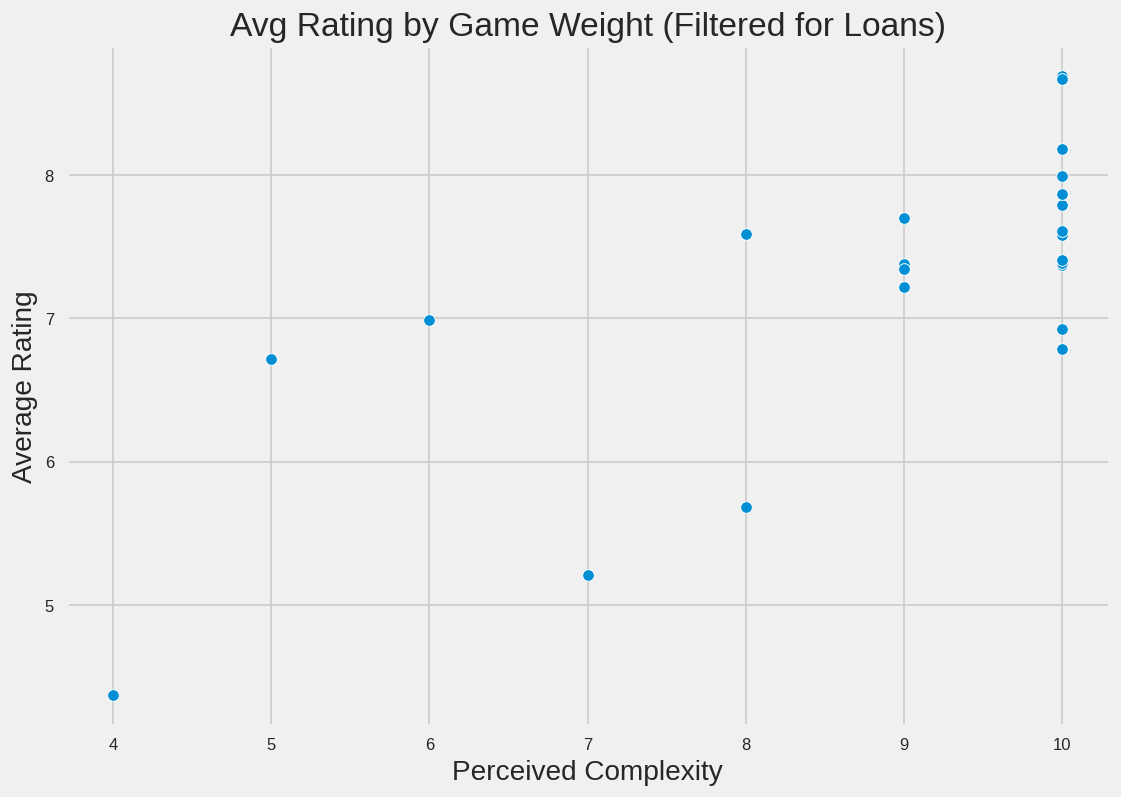

<Figure size 1200x720 with 0 Axes>

In [ ]:
#Uses Cat:War games as a filter and predicts rating based on Game Weight (user defined complexity)
variable = "Loans"
filtered_games = games[games[variable] == 1]

sns.scatterplot(data=filtered_games, x='GameWeight', y="AvgRating")
plt.title(f"Avg Rating by Game Weight (Filtered for {variable})")
plt.xlabel("Perceived Complexity")
plt.ylabel("Average Rating")
plt.figure(figsize=(10, 6), dpi=120)


In [ ]:
# Establishes median value for GameWeight for each value of AvgRating
gamesbymed = games.groupby(["GameWeight"])["AvgRating"].median()

# The 'groupby' above works but sets GameWeight as index, formula
#below moves it back to column
gamesbymed = gamesbymed.reset_index()
gamesbymed.head()

,GameWeight,AvgRating
0,0.0000,6.32215
1,1.0000,5.80000
2,1.0147,5.29893
3,1.0154,5.13344
4,1.0172,5.79069


In [ ]:
# Splitting data into TRAIN and TEST sets
# Defining the feature (X) and target (y) variables
X = gamesbymed[['GameWeight']]
y = gamesbymed['AvgRating']
# Splitting the data into training and test sets in proportion of 80% and 20% respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
# Splitting data into TRAIN and TEST sets
# Defining the feature (X) and target (y) variables
X = filtered_games[['GameWeight']]
y = filtered_games['AvgRating']
# Splitting the data into training and test sets in proportion of 80% and 20% respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

NameError: name 'filtered_games' is not defined

In [ ]:
# Initializing the linear regression model
model = LinearRegression()
# Training the model on the training data available
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Combine the training features and target into one DataFrame
df_train = pd.concat([X_train, y_train], axis=1)

In [ ]:
df_train.head()

,GameWeight,AvgRating
0,0.0000,6.32215
1,1.0000,5.80000
2,1.0147,5.29893
3,1.0154,5.13344
4,1.0172,5.79069


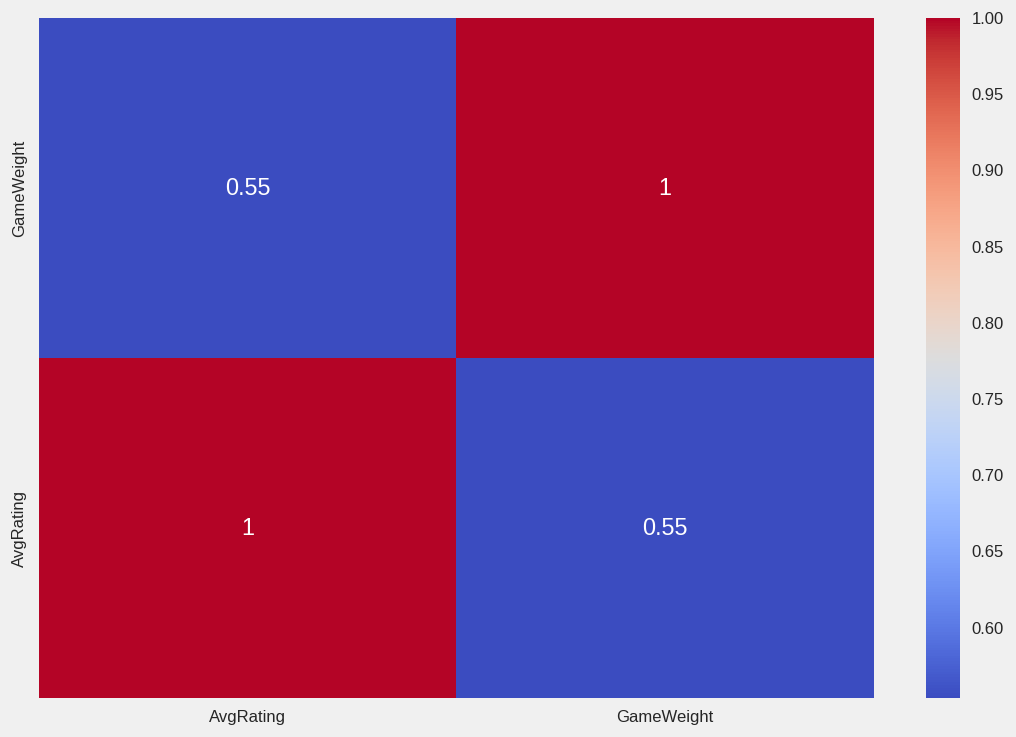

In [ ]:
# looks at correlation
# closer to 1 is a stronger correlation
# multicolinearity - how much do each of the components affect each other?
correlation_matrix = df_train.corr(numeric_only = True)
sns.heatmap(correlation_matrix[['AvgRating','GameWeight']], annot=True, cmap='coolwarm');

In [ ]:
# Making predictions on the testing data
y_pred = model.predict(X_test)

In [ ]:
  y_full_pred = model.predict(X)  #my attempt at sorting this

In [ ]:
# Evaluating the models using MSE metric
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.3690498456681642


In [ ]:
#Finds Root Square Mean Error
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.6074947289221234


In [ ]:
#Mean absolute percentage error
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.06376306611135812

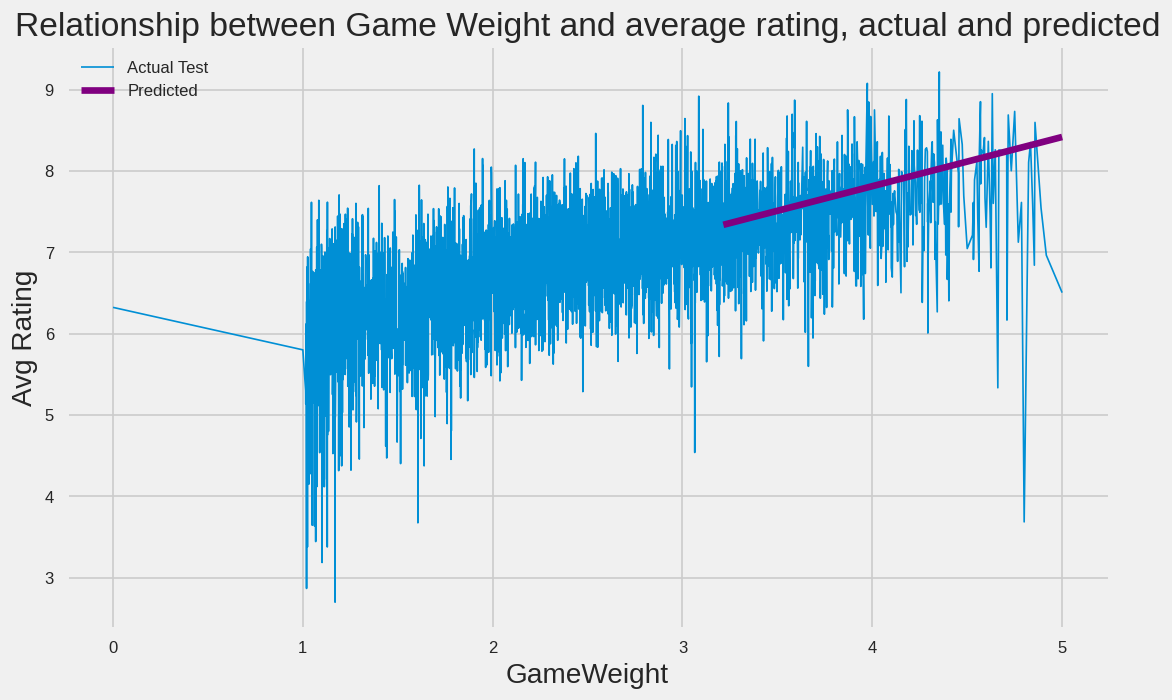

In [ ]:
# Defining the feature (X) and target (y) variables
X = gamesbymed[['GameWeight']]
y = gamesbymed['AvgRating']
# Splitting the data into training and test sets in proportion of 80% and 20% respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False) #shuffle = false preserves the Time Series order

# Initializing the linear regression model
model = LinearRegression()
# Training the model on the training data available
model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = model.predict(X_test)

# Plotting the actual vs predicted values inorder to visualize model performance
plt.figure(figsize=(10, 6))
plt.plot(gamesbymed[['GameWeight']], gamesbymed['AvgRating'], label='Actual Test', linewidth=1.0)
plt.plot(gamesbymed.loc[X_test.index,['GameWeight']], y_pred, label='Predicted', color='purple')
plt.title('Relationship between Game Weight and average rating, actual and predicted')
plt.xlabel('GameWeight')
plt.ylabel('Avg Rating')
plt.legend()
# Saving the plot as an image
plt.savefig('actual_vs_predicted.png')
plt.show()

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(gamesbymed, test_size=0.3,
                                     random_state=1234) # last part sets state so that if you closed it you would get the same results

In [ ]:
# We need to separate target (y) from the input variables X
# splitting the target variable (what we're trying to predict) into train and test iterations

X_train = df_train.drop('AvgRating', axis=1)
X_test = df_test.drop('AvgRating', axis=1)

y_train = df_train['AvgRating']
y_test = df_test['AvgRating']

In [ ]:
# Using a different package (statsmodels) to run linear regression. It has nicer output....

# use statsmodels
import statsmodels.formula.api as smf

# this is our formula
f = "AvgRating ~ GameWeight"

# notice unlike the previous method (sklearn linear regression) ...
#it does not separte out the target (i.e Grade) and features (the other columns) separately
model_ols = smf.ols(formula=f, data=df_train)

model_fit = model_ols.fit()

# To print the summary
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              AvgRating   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     1840.
Date:                Sun, 19 Oct 2025   Prob (F-statistic):          4.31e-308
Time:                        14:21:39   Log-Likelihood:                -2356.5
No. Observations:                2744   AIC:                             4717.
Df Residuals:                    2742   BIC:                             4729.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5352      0.032    174.624      0.0